[(0.0, 0.0), (0.0, 99800000.0000000), (90000000.0000000, 0.0)]


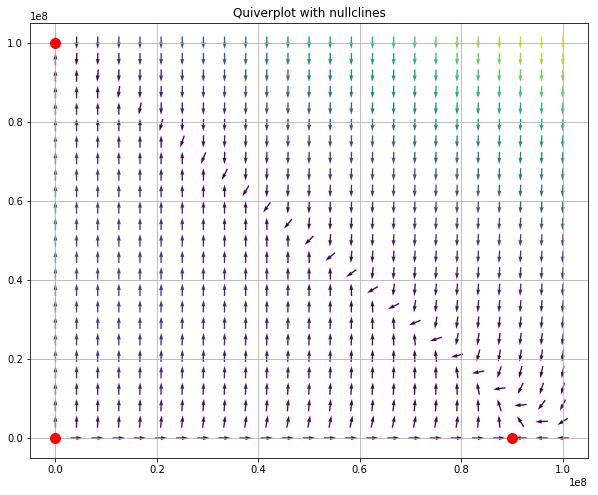

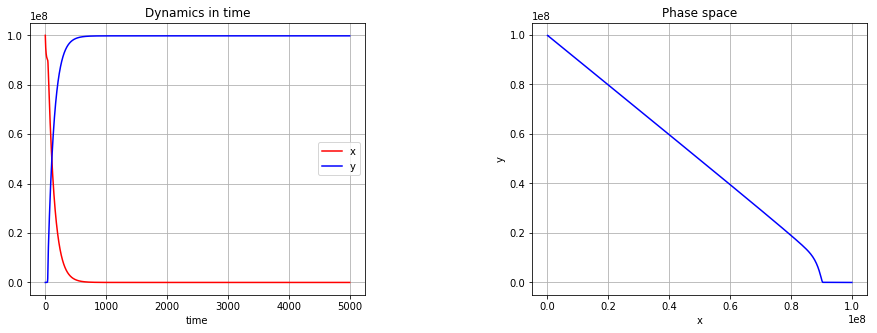

In [44]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate

# define the system in this way (asuming a predator-prey-system with no negative values)
# to avoid interference x = r (for resource) and y = c (for consumer)
k = 10**8
r1 = 0.1
r2 = 5
d1 = 0.01
d2 = 0.01

x, y = sm.symbols('x, y', negative=False)
X = r1*x*(k-x-y)/k - d1*x
Y = r2*y*(k-x-y)/k - d2*y

# use sympy's way of setting equations to zero
XEqual = sm.Eq(X, 0)
YEqual = sm.Eq(Y, 0)

# compute fixed points
equilibria = sm.solve( (XEqual, YEqual), x, y )
print(equilibria)

# define the system in numpy arrays
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ r1*X[0]*(k - X[0] -X[1])/k - d1*X[0], r2*X[1]*(k - X[0] -X[1])/k - d2*X[1] ])

# quiver plot
fig2 = plt.figure(figsize=(10,8))
ax4 = fig2.add_subplot(1,1,1)

x = np.arange(0,k*1.5)
y = np.arange(0,k*1.5)

# plot nullclines
# ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline')
# ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

fp = equilibria
# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Quiverplot with nullclines")
# ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(0, k, 25)
y = np.linspace(0, k, 25)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
# ax4.legend()
ax4.grid()


# generate 1000 linearly spaced numbers for x-axes
t = np.arange(0, 5000)
# initial values: x0 = k, y0 = 1
Sys0 = np.array([k, 1])

# # define the system in numpy arrays
# def Sys(X, t=0):
#     k = 10000
#     # here X[0] = x and x[1] = y    
#     return np.array([ r1*X[0]*(k - X[0] -X[1])/k , r2*X[1]*(k - X[0] -X[1])/k ])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
I, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = I.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='x')
ax1.plot(y, 'b-', label='y')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, 'b-')
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

- When r1 and r2 < 1:
    - When r1 is large and d1 is small (three orders of magnitude or less), selective sweeps are rare, with limited replacement of x with y occurring only for very small values of x (in the phase plane). If starting from x0 = k and y0 = 1, y never grows sufficiently within the timeframe of 1500 time steps. This can be observed when:
        - r1 = 0.1
        - r2 = 0.5
        - d1 = d2 = 0.001
        - k = 10^8
    
    - When r1 is about two orders of magnitude larger than d1, selective sweeps are much more likely within the given timeframe.
        - r1 = 0.1
        - r2 = 0.5
        - d1 = d2 = 0.01
        - k = 10^8

- When r1 and r2 > 1:
    - The effect of the gap between r1 and d1 remains the same qualitatively; more than three orders of magnitude higher r1 leads to negligible competitive growth of y over x.
        - r1 = 1
        - r2 = 5
        - d1 = d2 = 0.001
        - k = 10^8

- When r1 < 1:
    - Even if r1 exceeds d1 by a large margin making death in x insignificant, large enough values of y can still invade x population and grow to a substantial degree, and to complete replacement, as shown by the phase plane.
        - r1 = 0.1
        - r2 = 5
        - d1 = d2 = 0.001
        - k = 10^8
    
    - When the gap between r1 and d1 is reduced, competitive exclusion of x occurs much earlier.
        - r1 = 0.1
        - r2 = 5
        - d1 = d2 = 0.01
        - k = 10^8